# Introduction to K-means Clustering

## [Explore the Theoratical Concepts](https://excalidraw.com/#json=09GqUo83CN1bYMqzdsubh,02cqJPsHSNbEM2pdmOeVPA)

# **About Author**

<table style="border-collapse: collapse; width: 100%; text-align: left; font-family: Arial, sans-serif; font-size: 14px;">
  <tr>
    <th style="border: 1px solid #ccc; padding: 6px;">Name</th>
    <td style="border: 1px solid #ccc; padding: 6px;">Muhammad Hamza</td>
  </tr>
  <tr>
    <th style="border: 1px solid #ccc; padding: 6px;">Email</th>
    <td style="border: 1px solid #ccc; padding: 6px;">hamzah151115@gmail.com</td>
  </tr>
  <tr>
    <th style="border: 1px solid #ccc; padding: 6px;">LinkedIn</th>
    <td style="border: 1px solid #ccc; padding: 6px;"><a href="https://linkedin.com/in/hamzajatt" target="_blank">linkedin.com/in/hamzajatt</a></td>
  </tr>
  <tr>
    <th style="border: 1px solid #ccc; padding: 6px;">GitHub</th>
    <td style="border: 1px solid #ccc; padding: 6px;"><a href="https://github.com/hamzasaeed15" target="_blank">github.com/hamzasaeed15</a></td>
  </tr>
</table>





K-means is an unsupervised machine learning algorithm used to group data into 'K' number of clusters, where each cluster contains data points that are similar to each other.

# **Key Idea**:

- 1. Choose the number of clusters (K).
- 2. Randomly select K points as initial "centroids".
- 3. Assign each data point to the nearest centroid.
- 4. Update centroids as the mean of all points in their cluster.
- 5. Repeat steps 3–4 until centroids no longer change (or max iterations reached).
 

# **Example of K-means Clustering Algorithm**


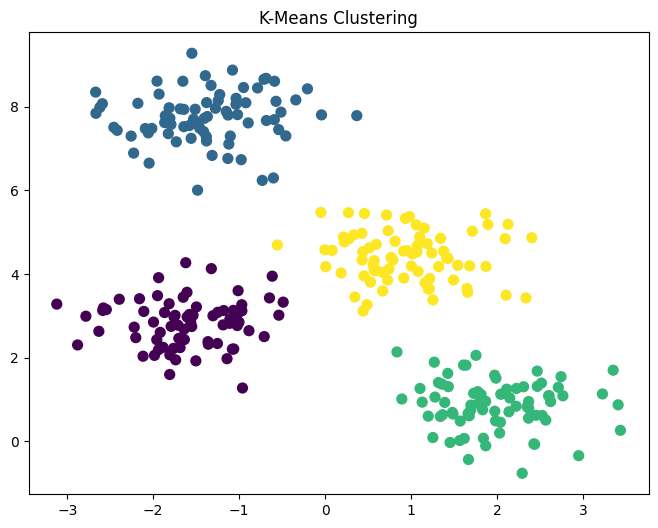

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Sample data generation
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

#initializing KMeans
kmeans = KMeans(n_clusters=4)

# Fitting the model
kmeans.fit(X)

# Get the predicted cluster labels on each data point
labels = kmeans.labels_

# Plotting data with different color for a different cluster
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


# **Same Example with Diamonds dataset**

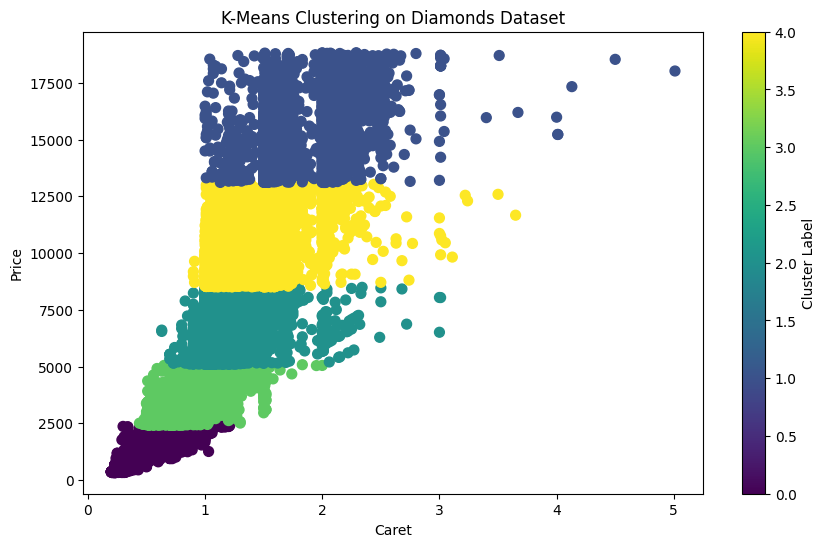

In [7]:
df = sns.load_dataset('diamonds')

X = df[['carat', 'price']]

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Predicted cluster labels
labels = kmeans.labels_

# Adding cluster labels to the DataFrame
df['cluster'] = labels

# Plot the data points with cluster labels with different colors
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel('Caret')
plt.ylabel('Price')
plt.title('K-Means Clustering on Diamonds Dataset')
plt.colorbar(label='Cluster Label')
plt.show()


# **Using K-means for further EDA Tasks**

In [18]:
dimonds = sns.load_dataset("diamonds")
# Relevent Columns
X = dimonds[['carat', 'price']]

# Initialize the K-mean object with defined no of Clusters
kmeans = KMeans(n_clusters=2)

# Fitting model to data
kmeans.fit(X)

# Get the predicted cluster labels on each data point
labels = kmeans.predict(X)

dimonds['labels'] = labels

print(dimonds.head())

print(f"These are the unique values in the labels column: {dimonds['labels'].unique()}")

   carat      cut color clarity  depth  table  price     x     y     z  labels
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43       0
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31       0
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31       0
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63       0
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75       0
These are the unique values in the labels column: [0 1]


# **Model Evaluation**

### **1.Elbow Method**

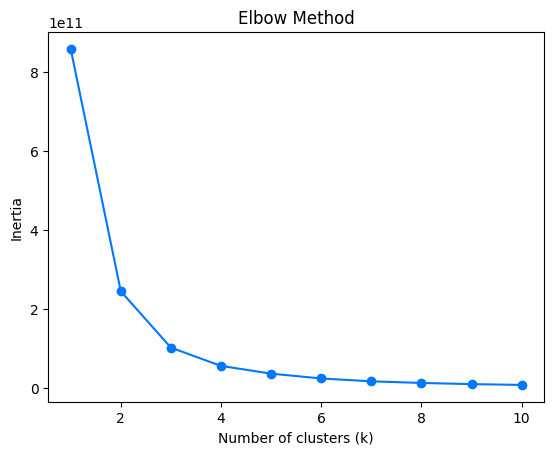

In [17]:
df = sns.load_dataset('diamonds')
# selecting relevent features
features = ['carat', 'depth', 'price']
X = df[features]

# Clustering with different values of K
# range
k_values = range(1,11) #testing K from ranges 1 to 10
inertias = [] #empty list of inertia (Within cluster sum of squares) where we will store the inertia of every K-values
#using for loop
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_) # inertia of every k values

# Plotting the Elbow-curve
plt.plot(k_values, inertias, 'bo-', color='#0077ff')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# **Finding the Elbo point**

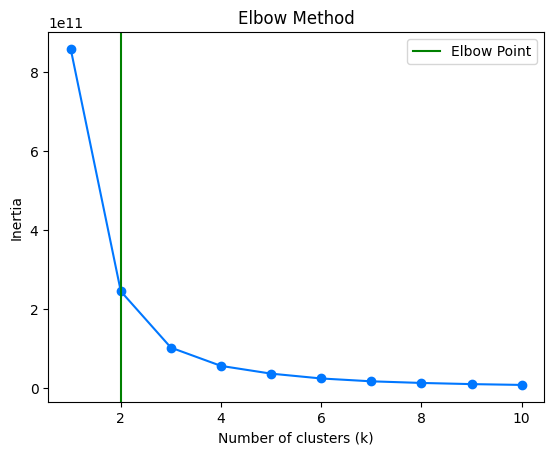

The Best number of cluster points based on Elbow method is 2


In [30]:
plt.plot(k_values, inertias, 'bo-', color='#0077ff')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

elbow = [inertias[i] - inertias[i+1] for i in range (len(inertias)-1)]
best_k = elbow.index(max(elbow)) + 2

# adding a vertical line to indicate the albow point
plt.axvline(x=best_k, color='green', linestyle='-', label='Elbow Point')
plt.legend()
plt.show()

print(f"The Best number of cluster points based on Elbow method is", best_k)

### 2. **Silhouette Method**

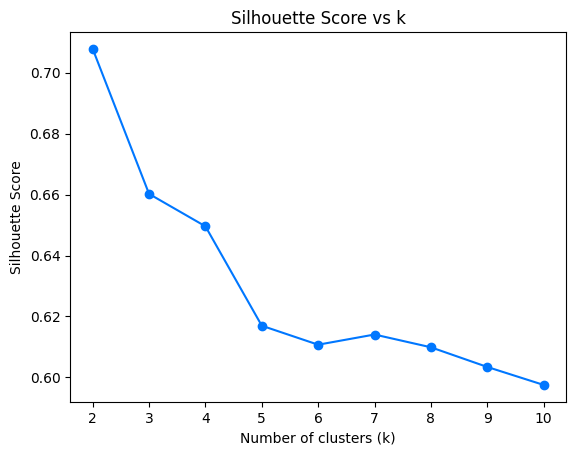

In [36]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

plt.plot(list(k_values), silhouette_scores, marker='o', color='#0077ff')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.show()
